In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!curl -L "https://app.roboflow.com/ds/3ppANxaP5R?key=19TsIetOzf" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   892  100   892    0     0    669      0  0:00:01  0:00:01 --:--:--   669
100  558k  100  558k    0     0   263k      0  0:00:02  0:00:02 --:--:-- 4431k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/Types-of-Dogs-4_jpg.rf.000e6508eeb218688e9654c7c0d14446.jpg  
 extracting: test/Types-of-Dogs-6_jpg.rf.28780c9df92df22c73fe0bd15d36feb6.jpg  
 extracting: test/Types-of-Dogs-7_jpg.rf.bd2ed257116b839bbc39531e4e825838.jpg  
 extracting: test/_annotations.coco.json  
   creating: train/
 extracting: train/Types-of-Dogs-10_jpg.rf.735b286e4e385003b5311e27c0c8dfae.jpg  
 extracting: train/Types-of-Dogs-12_jpg.rf.b8c06e5d1d688d39f8c5af3140e54c8a.jpg  
 extracting: train/Types-of-Dogs-13_jpg.rf.5f0eaca2b187ae51a4ded9f1b0b33a45.jpg  
 extracting: trai

In [ ]:
!python -m pip install pyyaml==5.1
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp310-cp310-linux_x86_64.whl size=44090 sha256=2ab02049db06705fc17c1978355707298e6fd4c8d0d117bfa7b98d921a7248c6
  Stored in directory: /root/.cache/pip/wheels/70/83/31/975b737609aba39a4099d471d5684141c1fdc3404f97e7f68a
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.12.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
flax 0.7.0 requires PyYAML>=5.4.1, but you have pyyaml 5.1 which is incompatible.
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-eucgny8_
  Ru

In [ ]:
import torch
import detectron2
!nvcc --version
TORCH_VERSION = '.'.join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split('+')[-1]
print('torch: ',TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print('detectron2: ',detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2:  0.6


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances('dog_detection_train3',{}, '/content/_annotations.coco.json','/content/train')
register_coco_instances('dog_detection_test2',{},'/content/_annotations.coco.json','/content/test')

In [ ]:
from omegaconf.base import Metadata
dog_metadata = MetadataCatalog.get('dog_detection_train3')
dataset_dicts=DatasetCatalog.get('dog_detection_train3')

WARNING [07/21 06:43:40 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/21 06:43:40 d2.data.datasets.coco]: Loaded 7 images in COCO format from /content/_annotations.coco.json


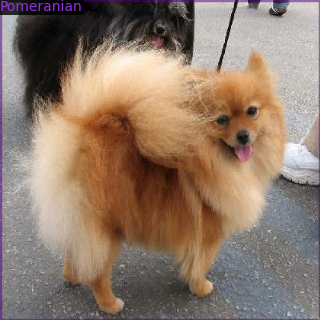

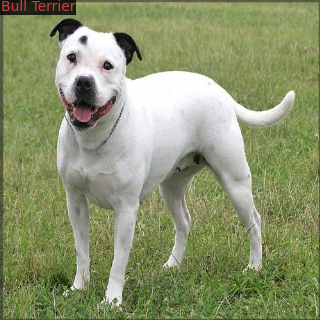

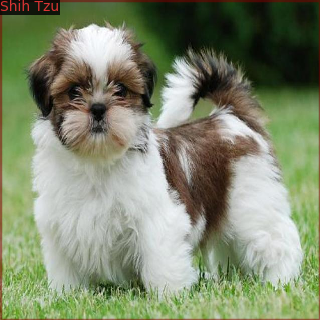

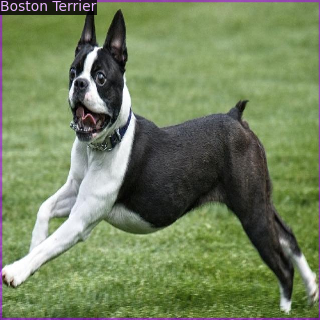

In [ ]:
import random

for d in random.sample(dataset_dicts, 4):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=dog_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])